# Develop_A_Neural_Network_That_Can_Read_Handwriting

In [1]:
import numpy as np
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
mnist

<module 'keras.api._v2.keras.datasets.mnist' from 'C:\\Users\\kajal\\anaconda3\\lib\\site-packages\\keras\\api\\_v2\\keras\\datasets\\mnist\\__init__.py'>

In [3]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11490434/11490434 [==============================] - 7s 1us/step


In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

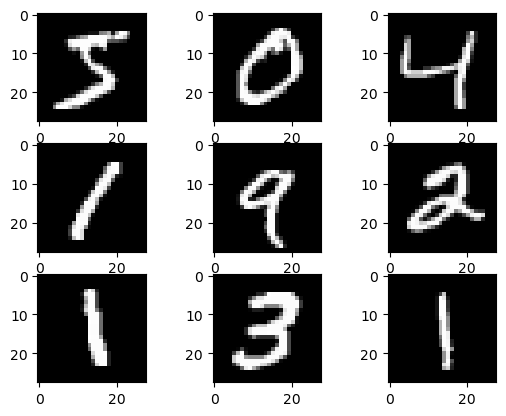

In [7]:
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
plt.show()

In [8]:
X_train_r = X_train.reshape(X_train.shape[0], X_train.shape[2], X_train.shape[2], 1)

In [9]:
X_test_r = X_test.reshape(X_test.shape[0], X_test.shape[2], X_test.shape[2], 1)

In [10]:
X_train_r = tf.keras.utils.normalize(X_train_r, axis = 1)

In [11]:
X_test_r = tf.keras.utils.normalize(X_test_r, axis = 1)

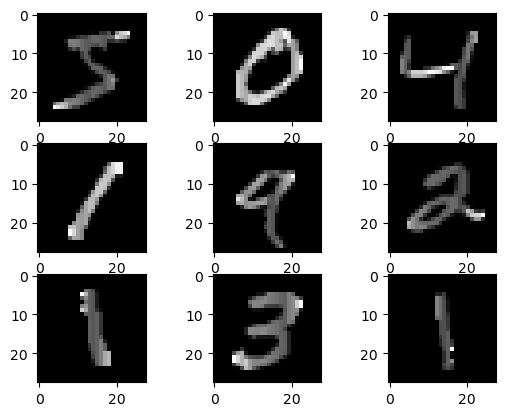

In [12]:
for i in range(9):
  plt.subplot(330 + 1 + i)
  plt.imshow(np.squeeze(X_train_r[i]), cmap=plt.get_cmap('gray'))
plt.show()

In [13]:
image_shape = X_train_r.shape[1:]

In [14]:
print(image_shape)

(28, 28, 1)


In [15]:
model = model = tf.keras.models.Sequential()

In [16]:
model.add(tf.keras.layers.Conv2D(48, (3,3), activation = tf.nn.relu, input_shape = image_shape))

In [17]:
model.add(tf.keras.layers.MaxPool2D((2,2)))

In [18]:
model.add(tf.keras.layers.Conv2D(64, (3,3), activation = tf.nn.relu))

In [19]:
model.add(tf.keras.layers.MaxPool2D((2,2)))

In [20]:
model.add(tf.keras.layers.Dropout(0.5))

In [21]:
model.add(tf.keras.layers.Flatten())

In [22]:
model.add(tf.keras.layers.Dense(256, activation = tf.nn.relu))

In [23]:
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))

In [24]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(X_train_r, Y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 79s 39ms/step - loss: 0.1933 - accuracy: 0.9411
Epoch 2/10
1875/1875 [==============================] - 74s 39ms/step - loss: 0.0727 - accuracy: 0.9765
Epoch 3/10
1875/1875 [==============================] - 73s 39ms/step - loss: 0.0544 - accuracy: 0.9836
Epoch 4/10
1875/1875 [==============================] - 73s 39ms/step - loss: 0.0431 - accuracy: 0.9864
Epoch 5/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0372 - accuracy: 0.9883
Epoch 6/10
1875/1875 [==============================] - 68s 36ms/step - loss: 0.0310 - accuracy: 0.9905
Epoch 7/10
1875/1875 [==============================] - 67s 36ms/step - loss: 0.0279 - accuracy: 0.9906
Epoch 8/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.0267 - accuracy: 0.9911
Epoch 9/10
1875/1875 [==============================] - 65s 34ms/step - loss: 0.0235 - accuracy: 0.9923
Epoch 10/10
1875/1875 [==============================] - 65s 35m

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 48)        480       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 48)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        27712     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 5, 5, 64)          0         
                                                                 
 flatten (Flatten)           (None, 1600)              0

In [26]:
from tensorflow.keras.utils import plot_model
plot_model(model, 'model.jpg', show_shapes = True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [27]:
val_loss, val_accuracy = model.evaluate(X_test, Y_test)
print("Validation loss : ", val_loss*100, "%")
print("Validation accuracy : ", val_accuracy*100,"%")

313/313 [==============================] - 5s 12ms/step - loss: 340.4288 - accuracy: 0.8290
Validation loss :  34042.88330078125 %
Validation accuracy :  82.89999961853027 %


In [28]:
model.save('/content/drive/MyDrive/Machine Learning Projects/Mnist.model')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Machine Learning Projects/Mnist.model\assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Machine Learning Projects/Mnist.model\assets


In [29]:
new_model = tf.keras.models.load_model("/content/drive/MyDrive/Machine Learning Projects/Mnist.model")

313/313 [==============================] - 4s 12ms/step


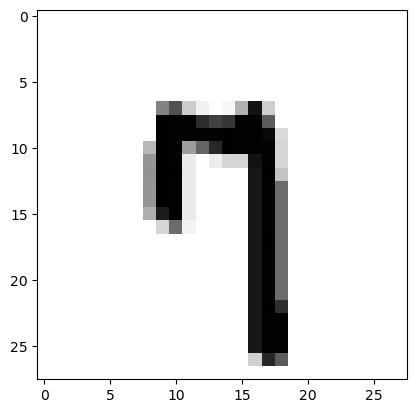

In [30]:
predictions = new_model.predict(X_test)
plt.imshow(X_test[80], cmap = plt.get_cmap('binary'))

In [31]:
print("The prediction is : ", np.argmax(predictions[80]))

The prediction is :  7
